In [2]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [3]:
# Definition of bifurcation function

def bifurcation(x, r):
    return(r * (1 - x) * x)

## Numpy

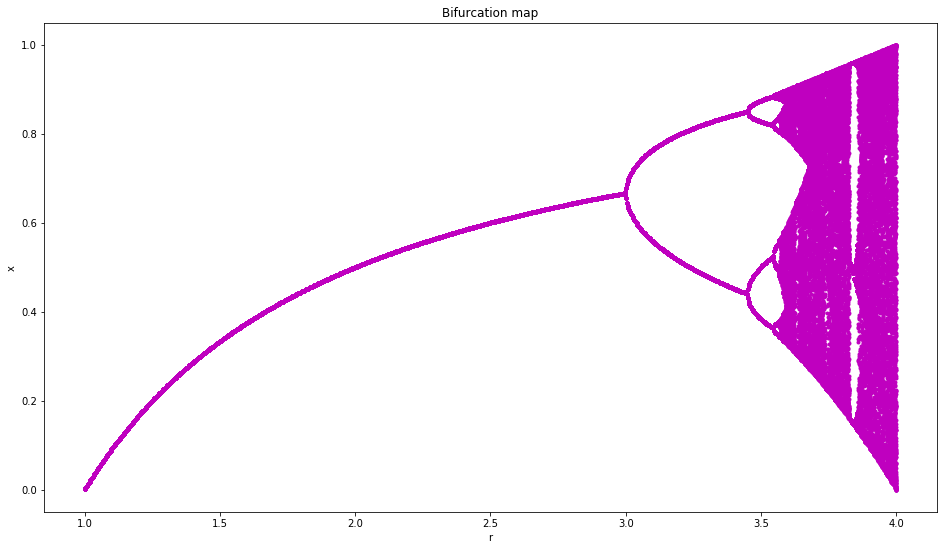

In [4]:
# Here we can observe bifurcation with 200 elements of our X_n left
from time import time

Range = 1001
plt.figure(figsize = (16,9))
r = np.linspace(1,4,Range)
X =[]
X = np.array(X)
x = np.random.rand()*np.ones(Range)
Time_array = []
for n in range(Range):
    start_time = time()
    x = bifurcation(x, r)
    if n > (Range - 200): plt.plot(r, x, 'm.') # restriction for last 200 elements and plotting
    Time_array = np.append(Time_array, time() - start_time)
plt.title('Bifurcation map')
plt.xlabel('r')
plt.ylabel('x')
plt.show()    

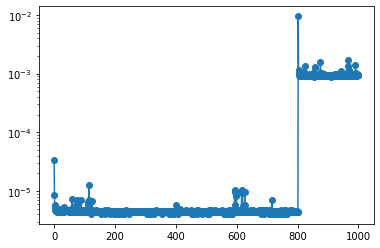

In [5]:
plt.yscale('log')
plt.plot(range(Range), Time_array, '.-', markersize=12)

In [6]:
x

array([0.00098901, 0.00314217, 0.00597797, ..., 0.98520855, 0.13746521,
       0.48633358])

## CuPy

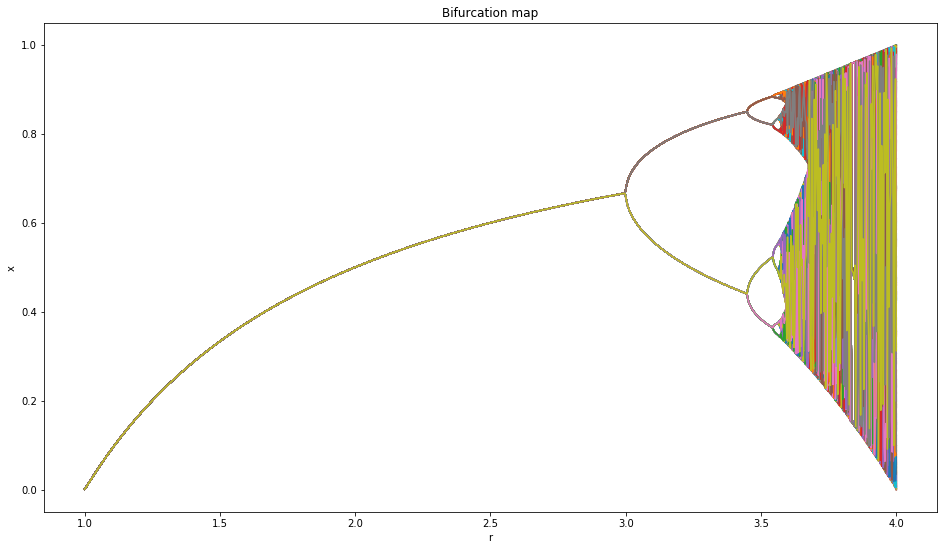

In [7]:
# Here we can observe bifurcation with 200 elements of our X_n left
from time import time
Range = 1001
plt.figure(figsize = (16,9))
r = cp.linspace(1,4,Range)
x = np.random.rand()*cp.ones(Range)
Time_array_cp = cp.zeros(Range)
cp.cuda.Stream.null.synchronize()
for n in range(Range):
    start_time = time()
    x = bifurcation(x, r)
    if n > (Range - 200): plt.plot(cp.asnumpy(r), cp.asnumpy(x)) # restriction for last 200 elements and plotting
    Time_array_cp[n] = time() - start_time
plt.title('Bifurcation map')
plt.xlabel('r')
plt.ylabel('x')
plt.show()    

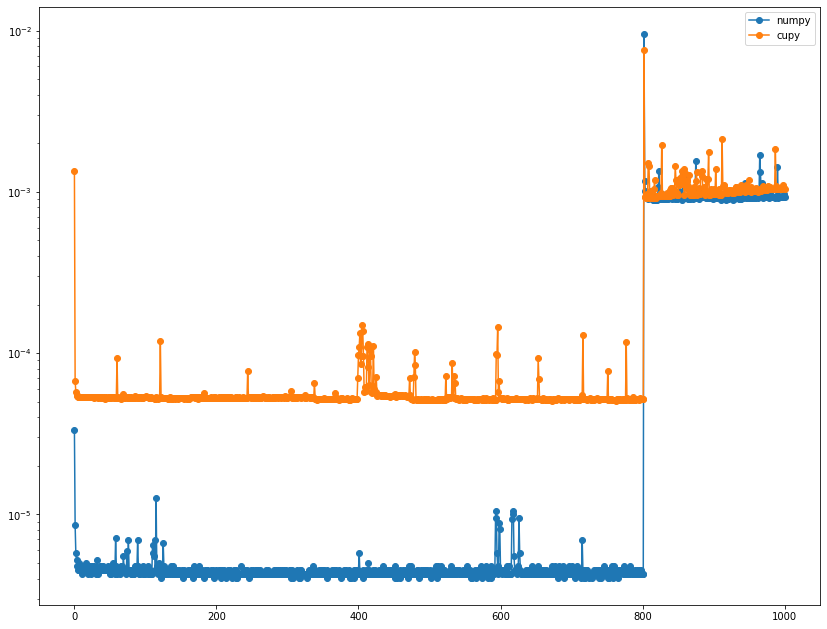

In [8]:
plt.figure(figsize = (14,11))
plt.yscale('log')
plt.plot(range(Range), cp.asnumpy(Time_array), '.-', markersize=12, label = 'numpy')
plt.plot(range(Range), cp.asnumpy(Time_array_cp), '.-', markersize=12, label = 'cupy')
plt.legend(loc = 'best')

In [14]:
def np_time(size):
    Range = 1000
    r = np.linspace(1, 4, size)
    x = np.random.random()
    for i in range(Range):
        x = bifurcation(x, r)

In [15]:
def cp_time(size):
    Range = 1000
    r = cp.linspace(1, 4, size)
    x = cp.random.random()
    for i in range(Range):
        x = bifurcation(x, r)

## Profiling CuPy perfomance

In [16]:
import cProfile
cProfile.run('cp_time(10000)')

         82019 function calls in 0.078 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    27001    0.007    0.000    0.027    0.000 <__array_function__ internals>:2(can_cast)
        1    0.001    0.001    0.078    0.078 <ipython-input-15-75fce1a56010>:1(cp_time)
     1000    0.038    0.000    0.065    0.000 <ipython-input-3-8f23460ac14f>:3(bifurcation)
        1    0.000    0.000    0.078    0.078 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 basic.py:7(empty)
        1    0.000    0.000    0.000    0.000 generator.py:1123(get_random_state)
        1    0.000    0.000    0.000    0.000 generator.py:1161(_check_and_get_dtype)
        1    0.000    0.000    0.000    0.000 generator.py:498(_random_sample_raw)
        1    0.000    0.000    0.000    0.000 generator.py:508(random_sample)
    27001    0.002    0.000    0.002    0.000 multiarray.py:469(can_cast)
        1    0.000    0.000    0.000    0.000 

In [23]:
from time import time
import os

time_cuda = []
time_numpy = []
time_MPI = []
R= np.linspace(10000, 100000, 10, dtype = int)
time_start = 0
for i in R:
    
    time_start = time.time()
    np_time(i)
    time_numpy.append(time.time() - time_start)
    
    time_start = time.time()
    os.system("mpirun -n 8 python3 Bifurcation._mpi.py {}".format(i))
    time_MPI.append(time.time() - time_start)
    
    time_start = time.time()
    cp_time(i)
    time_cuda.append(time.time() - time_start)

15.8 ms ± 536 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
74.8 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.9 ms ± 200 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
28.9 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
72.6 ms ± 593 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
52 ms ± 438 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
42.6 ms ± 831 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
78.5 ms ± 3.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
53.6 ms ± 861 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
69.6 ms ± 3.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
76.3 ms ± 3.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
51.1 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
79.4 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
83.1 ms ± 7.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
54.8 ms ± 897 

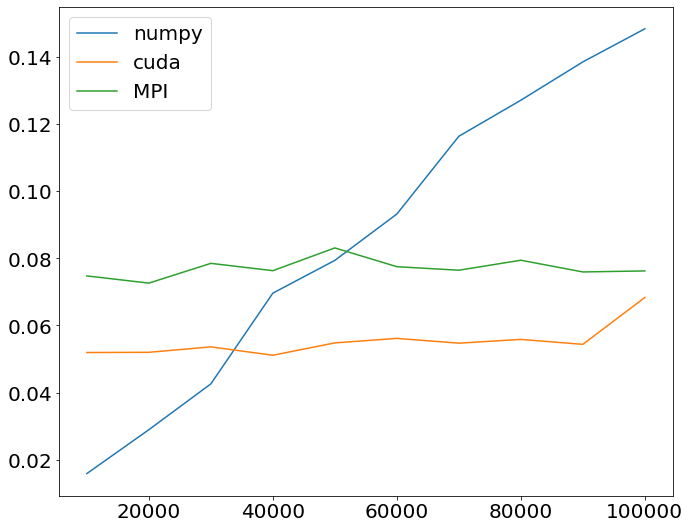

In [27]:
plt.figure(figsize=(11, 9))
plt.plot(R, time_numpy, label='numpy')
plt.plot(R, time_cuda, label='cuda')
plt.plot(R, time_MPI, label='MPI')
plt.legend(loc='best')
#plt.xscale('log')
plt.show()

In [33]:
import time
import os

time_cuda = []
time_numpy = []
time_MPI = []
R= np.linspace(10000, 1000000, 100, dtype = int)
time_start = time_end = 0
for i in R:
    time_start = time.time()
    np_time(i)
    time_numpy.append(time.time() - time_start)
    
    time_start = time.time()
    os.system("mpirun -n 8 python3 Bifurcation._mpi.py {}".format(i))
    time_MPI.append(time.time() - time_start)
    
    time_start = time.time()
    cp_time(i)
    time_cuda.append(time.time() - time_start)

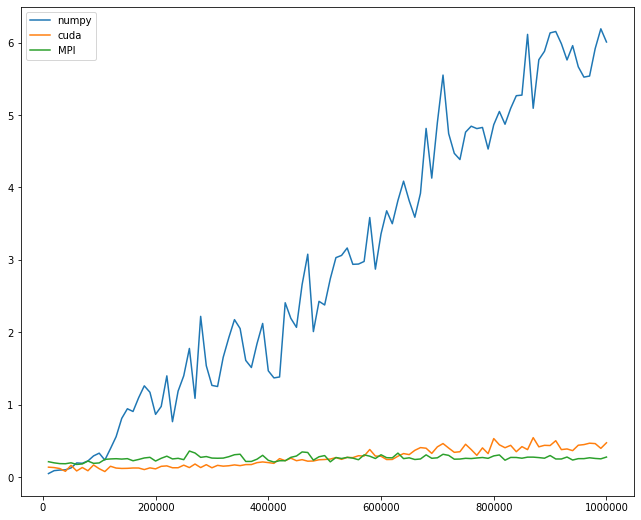

In [35]:
plt.figure(figsize=(11, 9))
plt.plot(R, time_numpy, label='numpy')
plt.plot(R, time_cuda, label='cuda')
plt.plot(R, time_MPI, label='MPI')
plt.legend(loc='best')
#plt.xscale('log')
plt.show()